# Team member :
 1.prem sagar kushwaha
 
 2.raunak ansari      
 
 3.harsh dev singh sengar
 
 4.ishwar singh panwar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.pdfgen import canvas
from reportlab.lib import pdfencrypt
from reportlab.lib.units import inch
from tkinter import *
from tkinter import filedialog


In [2]:
dataset = pd.read_csv("data.csv")

In [3]:
dataset = dataset.drop("id",axis=1)

In [4]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset.shape

(569, 32)

In [6]:
dataset.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [7]:
dataset.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

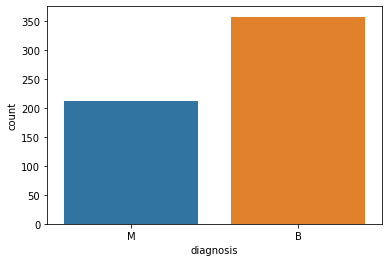

In [9]:
sns.countplot(dataset["diagnosis"],label='count')

In [10]:
dataset = dataset.drop('Unnamed: 32',axis=1)

In [11]:
dataset.shape

(569, 31)

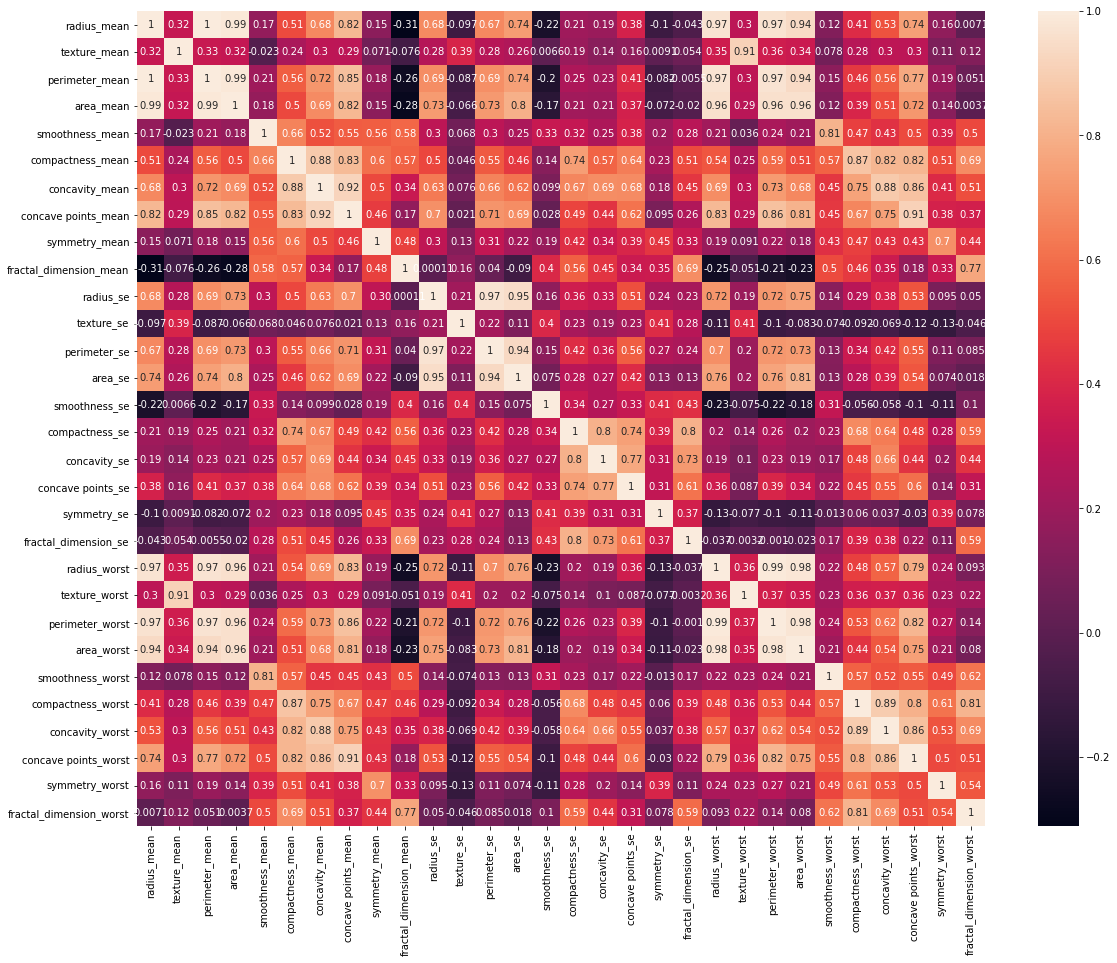

In [12]:
plt.figure(figsize=(19,15))
sns.heatmap(dataset.corr(),annot=True)

In [13]:
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 1 if x == "M" else 0)

In [14]:
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [16]:
newdata=dataset[dataset['diagnosis']==0]

In [17]:
newdata.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,0.0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,0.0,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,0.0,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,0.0,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,0.0,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,0.0,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [18]:
newdatas=dataset[dataset['diagnosis']==1]

In [19]:
newdatas.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,0.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,1.0,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,1.0,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,1.0,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,1.0,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,1.0,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [20]:
x = dataset.drop('diagnosis',axis=1)
y  = dataset['diagnosis']

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Train test split 

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=4 )
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [24]:
prediction=model_dt.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,prediction)

0.951048951048951

In [26]:
confusion_matrix(y_test,prediction)

array([[82,  5],
       [ 2, 54]], dtype=int64)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=7)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7)

In [28]:
x_test.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [29]:
prediction_rf = model_rf.predict(x_test)

In [30]:
accuracy_score(y_test,prediction_rf)

0.9370629370629371

In [31]:
confusion_matrix(y_test,prediction_rf)

array([[82,  5],
       [ 4, 52]], dtype=int64)

In [32]:
def model_prediction(series):
    
    lists = ["radius_mean",                
             "texture_mean",               
             "perimeter_mean",            
             "area_mean"  ,                
             "smoothness_mean"  ,          
             "compactness_mean" ,          
             "concavity_mean"  ,           
             "concave points_mean" ,       
             "symmetry_mean"    ,          
             "fractal_dimension_mean" ,   
             "radius_se" ,                 
             "texture_se"   ,              
             "perimeter_se" ,             
             "area_se"     ,              
             "smoothness_se" ,             
             "compactness_se"  ,           
             "concavity_se" ,             
             "concave points_se" ,         
             "symmetry_se"  ,              
             "fractal_dimension_se" ,      
             "radius_worst" ,              
             "texture_worst" ,             
             "perimeter_worst" ,           
             "area_worst" ,               
             "smoothness_worst",           
             "compactness_worst",   
             "concavity_worst",
             "concave points_worst","symmetry_worst",             
             "fractal_dimension_worst" ]
    for i in lists :
        series[i]=pd.to_numeric(series[i])
        
    predicted_diag = model_dt.predict(series)

    


In [ ]:
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk
import numpy as np
import pandas as pd

#create new window...


def exitw():
    root.destroy()




def d_button():

    def datafn():

        if (namev.get() == "" or agev.get() == "" or addv.get() == "" or mnov.get() == "" or IDv.get() == ""):
           a= messagebox.showerror("Error", "You have not fill all details!!",parent=top2)
        else:
            ans = messagebox.askokcancel("confirmation", "Do you want to save your data.")
            if ans is True:
                top3 = Toplevel()
                top3.geometry("1900x1900+1+1")
                top3.title("Dataset Entry ")
                top3.configure(background="blue")

                #bg_image = ImageTk.PhotoImage(file="C:\\Users\\raunak ansari\\Documents\\ED class\\15.jpg")

                #bg_label = Label(top3, image=bg_image)
                #bg_label.pack()


                l10 = Label(top3, text="Detials of Tissue", bg="yellow", bd=9, relief=GROOVE,font=("Eras Bold ITC", 52, "bold"))
                l10.place(x=0, y=0, relwidth=1)

                l11 = Label(top3, text="Radius_Mean", bg="blue", fg='red', font=("rockwell", 15, "bold"))
                l11.place(x=0, y=100)
                temp11 = StringVar()
                e11 = Entry(top3, width=20,textvariable=temp11, font=(40), bd=5)
                e11.place(x=220, y=100)

                l12 = Label(top3, text="Texture_Mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l12.place(x=0, y=150)
                temp12 = StringVar()
                #temp12 = int(temp12)
                e12 = Entry(top3, width=20, textvariable=temp12, font=(40), bd=5)
                e12.place(x=220, y=150)

                l13 = Label(top3, text="Parimeter_Mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l13.place(x=0, y=200)
                temp13 = StringVar()
                #temp13 = int(temp13)
                e13 = Entry(top3, width=20, textvariable=temp13, font=(40), bd=5)
                e13.place(x=220, y=200)

                l14 = Label(top3, text="Area_Mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l14.place(x=0, y=250)
                temp14 = StringVar()
                #temp14 = int(temp14)
                e14 = Entry(top3, width=20, textvariable=temp14, font=(40), bd=5)
                e14.place(x=220, y=250)

                l15 = Label(top3, text="Smoothness_Mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l15.place(x=0, y=300)
                temp15 = StringVar()
                #temp15 = int(temp15)
                e15 = Entry(top3, width=20, textvariable=temp15, font=(40), bd=5)
                e15.place(x=220, y=300)

                l16 = Label(top3, text="Compactness_Mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l16.place(x=0, y=350)
                temp16 = StringVar()
                #temp16 = int(temp16)
                e16 = Entry(top3, width=20, textvariable=temp16, font=(40), bd=5)
                e16.place(x=220, y=350)

                l17 = Label(top3, text="Concavity_Mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l17.place(x=0, y=400)
                temp17 = StringVar()
                #temp17 = int(temp17)
                e17 = Entry(top3, width=20, textvariable=temp17, font=(40), bd=5)
                e17.place(x=220, y=400)

                l18 = Label(top3, text="Concave point_mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l18.place(x=0, y=450)
                temp18 = StringVar()
                #temp18 = int(temp18)
                e18 = Entry(top3, width=20, textvariable=temp18, font=(40), bd=5)
                e18.place(x=220, y=450)

                l19 = Label(top3, text="Symmetry_Mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l19.place(x=0, y=500)
                temp19 = StringVar()
                #temp19 = int(temp19)
                e19 = Entry(top3, width=20, textvariable=temp19, font=(40), bd=5)
                e19.place(x=220, y=500)

                l20 = Label(top3, text="Fractal_dim_Mean", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l20.place(x=0, y=550)
                temp20 = StringVar()
                #temp20 = int(temp20)
                e20 = Entry(top3, width=20, textvariable=temp20, font=(40), bd=5)
                e20.place(x=220, y=550)

                l21 = Label(top3, text="Radius_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l21.place(x=500, y=100)
                temp21 = StringVar()
                #temp21 = int(temp21)
                e21 = Entry(top3, width=20, textvariable=temp21, font=(40), bd=5)
                e21.place(x=690, y=100)

                l22 = Label(top3, text="Texture_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l22.place(x=500, y=150)
                temp22 = StringVar()
                #temp22 = int(temp22)
                e22 = Entry(top3, width=20, textvariable=temp22, font=(40), bd=5)
                e22.place(x=690, y=150)

                l23 = Label(top3, text="Perimeter_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l23.place(x=500, y=200)
                temp23 = StringVar()
                #temp23 = int(temp23)
                e23 = Entry(top3, width=20, textvariable=temp23, font=(40), bd=5)
                e23.place(x=690, y=200)

                l24 = Label(top3, text="Area_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l24.place(x=500, y=250)
                temp24 = StringVar()
                #temp24 = int(temp24)
                e24 = Entry(top3, width=20, textvariable=temp24, font=(40), bd=5)
                e24.place(x=690, y=250)

                l25 = Label(top3, text="Smoothness_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l25.place(x=500, y=300)
                temp25 = StringVar()
                #temp25 = int(temp25)
                e25 = Entry(top3, width=20, textvariable=temp25, font=(40), bd=5)
                e25.place(x=690, y=300)

                l26 = Label(top3, text="Compactness_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l26.place(x=500, y=350)
                temp26 =StringVar()
                #temp26 = int(temp26)
                e26 = Entry(top3, width=20, textvariable=temp26, font=(40), bd=5)
                e26.place(x=690, y=350)

                l27 = Label(top3, text="Concavity_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l27.place(x=500, y=400)
                temp27 = StringVar()
                #temp27 = int(temp27)
                e27 = Entry(top3, width=20, textvariable=temp27, font=(40), bd=5)
                e27.place(x=690, y=400)

                l28 = Label(top3, text="Concave point_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l28.place(x=500, y=450)
                temp28 = StringVar()
                #temp28 = int(temp28)
                e28 = Entry(top3, width=20, textvariable=temp28, font=(40), bd=5)
                e28.place(x=690, y=450)

                l29 = Label(top3, text="Symmetry_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l29.place(x=500, y=500)
                temp29 = StringVar()
                #temp29 = int(temp29)
                e29 = Entry(top3, width=20, textvariable=temp29, font=(40), bd=5)
                e29.place(x=690, y=500)

                l30 = Label(top3, text="Fractal_dim_se", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l30.place(x=500, y=550)
                temp30 = StringVar()
                #temp30 = int(temp30)
                e30 = Entry(top3, width=20, textvariable=temp30, font=(40), bd=5)
                e30.place(x=690, y=550)

                l31 = Label(top3, text="Radius_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l31.place(x=1000, y=100)
                temp31 = StringVar()
                #temp31 = int(temp31)
                e31 = Entry(top3, width=20, textvariable=temp31, font=(40), bd=5)
                e31.place(x=1220, y=100)

                l32 = Label(top3, text="Texture_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l32.place(x=1000, y=150)
                temp32 = StringVar()
                #temp32 = int(temp32)
                e32 = Entry(top3, width=20, textvariable=temp32, font=(40), bd=5)
                e32.place(x=1220, y=150)

                l33 = Label(top3, text="Perimeter_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l33.place(x=1000, y=200)
                temp33 = StringVar()
                #temp33 = int(temp33)
                e33 = Entry(top3, width=20, textvariable=temp33, font=(40), bd=5)
                e33.place(x=1220, y=200)

                l34 = Label(top3, text="Area_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l34.place(x=1000, y=250)
                temp34 = StringVar()
                #temp34 = int(temp34)
                e34 = Entry(top3, width=20, textvariable=temp34, font=(40), bd=5)
                e34.place(x=1220, y=250)

                l35 = Label(top3, text="Smoothness_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l35.place(x=1000, y=300)
                temp35 = StringVar()
                # temp35=int(temp35)
                e35 = Entry(top3, width=20, textvariable=temp35, font=(40), bd=5)
                e35.place(x=1220, y=300)

                l36 = Label(top3, text="Compactness_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l36.place(x=1000, y=350)
                temp36 = StringVar()
                #temp36 = int(temp36)
                e36 = Entry(top3, width=20, textvariable=temp36, font=(40), bd=5)
                e36.place(x=1220, y=350)

                l37 = Label(top3, text="Concavity_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l37.place(x=1000, y=400)
                temp37 = StringVar()
                #temp37 = int(temp37)
                e37 = Entry(top3, width=20, textvariable=temp37, font=(40), bd=5)
                e37.place(x=1220, y=400)

                l38 = Label(top3, text="Concave point_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l38.place(x=1000, y=450)
                temp38 = StringVar()
                #temp38 = int(temp38)
                e38 = Entry(top3, width=20, textvariable=temp38, font=(40), bd=5)
                e38.place(x=1220, y=450)

                l39 = Label(top3, text="Symmetry_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l39.place(x=1000, y=500)
                temp39 = StringVar()
                #temp39 = int(temp39)
                e39 = Entry(top3, width=20, textvariable=temp39, font=(40), bd=5)
                e39.place(x=1220, y=500)

                l40 = Label(top3, text="Fractal_dim_worst", bg='blue', fg='red', font=("rockwell", 15, "bold"))
                l40.place(x=1000, y=550)
                temp40 = StringVar()
                #temp40 = int(temp40)
                e40 = Entry(top3, width=20, textvariable=temp40, font=(40), bd=5)
                e40.place(x=1220, y=550)



                def Report_win():

                    if (temp11.get()=="" or temp12.get()=="" or temp13.get()=="" or  temp14.get()=="" or  temp15.get()=="" or  temp16.get()=="" or
                       temp17.get()=="" or  temp19.get()=="" or  temp20.get()=="" or  temp21.get()=="" or  temp22.get()=="" or  temp23.get()=="" or
                       temp24.get()=="" or  temp25.get()=="" or  temp26.get()=="" or  temp27.get()=="" or  temp28.get()=="" or  temp29.get()=="" or
                       temp30.get()=="" or  temp31.get()=="" or  temp32.get()=="" or  temp33.get()=="" or  temp34.get()=="" or  temp34.get()=="" or
                       temp35.get()=="" or  temp36.get()=="" or  temp37.get()=="" or  temp38.get()=="" or  temp39.get()=="" or  temp40.get()=="" ):


                        messagebox.showerror("error","You have not fill required detail!!")
                    else:



                        top4=Toplevel()
                        top4.title("Patient Report")
                        top4.geometry("1900x1900+1+1")
                        top4.configure(background="blue")
                        top4.title("Diagnosis Report")

                        l41 = Label(top4,text = "   Diagnosis ",bg ="blue",font = ("Eras ITC bold" ,50,"bold"))
                        l41.place(x=400,y=0)

                        dataframe = pd.DataFrame({"radius_mean":temp11.get(),"texture_mean":temp12.get(),"perimeter_mean":temp13.get(),
                                            "area_mean":temp14.get(),"smoothness_mean":temp15.get(),"compactness_mean":temp16.get(),
                                            "concavity_mean":temp17.get(),"concave points_mean":temp18.get(),"symmetry_mean":temp19.get(),
                                            "fractal_dimension_mean":temp20.get(),"radius_se":temp21.get(),"texture_se":temp22.get(),"perimeter_se":temp23.get(),
                                            "area_se":temp24.get(),"smoothness_se":temp25.get(),"compactness_se":temp26.get(),
                                            "concavity_se":temp27.get(),"concave points_se":temp28.get(),"symmetry_se":temp29.get(),
                                            "fractal_dimension_se":temp30.get(),"radius_worst":temp31.get(),"texture_worst":temp32.get(),"perimeter_worst":temp33.get(),
                                            "area_worst":temp34.get(),"smoothness_worst":temp35.get(),"compactness_worst":temp36.get(),
                                            "concavity_worst":temp37.get(),"concave points_worst":temp38.get(),"symmetry_worst":temp39.get(),
                                            "fractal_dimension_worst":temp40.get()},index={"0"})
                        dataframe = dataframe.astype(float)
                        pred = model_rf.predict(dataframe)
                        
                        if pred[0]==0:
                            l42 = Label(top4, text = "Breast Cancer Negative",bg ="blue",font = ("Eras ITC bold" ,20,"bold"))
                            l42.place(x = 400,y = 300)
                        if pred[0]==1:
                            l43 = Label(top4, text = "Breast Cancer Positive",bg ="blue",font = ("Eras ITC bold" ,20,"bold"))
                            l43.place(x = 400,y = 350)
                            
                        def downloadreport():
                            filename = filedialog.asksaveasfilename(defaultextension = ".pdf")
                            pdf = canvas.Canvas(filename,bottomup=0)
                            pdf.setFont('Helvetica-Bold', 40)
                            pdf.showOutline()
                            pdf.setFillColorRGB(1,0,0)

                            pdf.drawString(230,60,"Report")
                            pdf.line(30,80,550,80)
                            pdf.line(30,80,30,220)
                            pdf.line(30,220,550,220)
                            pdf.line(550,80,550,220)
                        
                            pdf.setFont('Helvetica-Bold',14)
                            pdf.setFillColorRGB(0,0,0)
                            pdf.drawString(40,100,"Name :   "+namev.get())
                            pdf.drawString(40,130,"Age :   "+agev.get())
                            pdf.drawString(40,160,"Mobile no. :   "+mnov.get())
                            pdf.drawString(40,190,"Address :   "+addv.get())
                        
                            pdf.line(30,230,550,230)
                            pdf.line(30,230,30,700)
                            pdf.line(30,700,550,700)
                            pdf.line(550,700,550,230)
                        
                            pdf.setFont('Helvetica-Bold',14)
                            pdf.setFillColorRGB(0,0,0)
                        
                            pdf.drawString(40,245,"Cell Observation :-")

                            x = 40
                            y= 265
                            
                            
                            
                            
                        
                        
                        
                            lists = ["radius_mean"+temp11.get(),"texture_mean"+temp12.get(),"perimeter_mean"+temp13.get(),
                                            "area_mean"+temp14.get(),"smoothness_mean"+temp15.get(),"compactness_mean"+temp16.get(),
                                            "concavity_mean"+temp17.get(),"concave points_mean"+temp18.get(),"symmetry_mean"+temp19.get(),
                                            "fractal_dimension_mean"+temp20.get(),"radius_se"+temp21.get(),"texture_se"+temp22.get(),"perimeter_se"+temp23.get(),
                                            "area_se"+temp24.get(),"smoothness_se"+temp25.get(),"compactness_se"+temp26.get(),
                                            "concavity_se"+temp27.get(),"concave points_se"+temp28.get(),"symmetry_se"+temp29.get(),
                                            "fractal_dimension_se"+temp30.get(),"radius_worst"+temp31.get(),"texture_worst"+temp32.get(),"perimeter_worst"+temp33.get(),
                                            "area_worst"+temp34.get(),"smoothness_worst"+temp35.get(),"compactness_worst"+temp36.get(),
                                            "concavity_worst"+temp37.get(),"concave points_worst"+temp38.get(),"symmetry_worst"+temp39.get(),
                                            "fractal_dimension_worst"+temp40.get()]
                            pdf.setFont('Helvetica',12)
                            for i in lists :
                                
                                pdf.drawString(x,y,i)
                                y = y+14.3
                            pdf.line(30,250,550,250)
                            pdf.line(30,700,550,700)
                            pdf.line(30,720,550,720)
                            pdf.line(30,720,30,750)
                            pdf.line(30,750,550,750)
                            pdf.line(550,750,550,720)
                            pdf.setFont('Helvetica-Bold',12)
                            if pred[0]==0:
                                pdf.drawString(40,737,"Result - Breast Cancer Negative  ")
                            
                            if pred[0]==1:
                                 pdf.drawString(40,737,"Result - Breast Cancer Positive")
                            pdf.setFont('Helvetica',10)
                            pdf.drawString(400,760,"Email - info@diagnosos.gmail.com")
                        
                            pdf.line(10,10,580,10)
                            pdf.line(10,10,10,800)
                            pdf.line(10,800,580,800)
                            pdf.line(580,800,580,10)


                            pdf.save()
                        
                        
                        pdf_b = Button(top4,text= "download report",padx=10, pady=10, bd=7,font=("Eras Bold ITC", 20, "bold"), bg="green",command = downloadreport)
                        pdf_b.place(x= 400,y= 550)







    
    

                        
                            
                        
                            
                            
                        
                        
                        
    





                        top4.mainloop()

                pd_btn = Button(top3, text="Predict for diagnosis", padx=10, pady=10, bd=7,font=("Eras Bold ITC", 20, "bold"), bg="green", command=Report_win)
                pd_btn.place(x=500, y=670)

                exitbtn1 = Button(top3, text="exit", bd=7, padx=10, pady=10, font=("Eras Bold ITC", 20, "bold"), bg="yellow",command=exitw)
                exitbtn1.place(x=900, y=670)

                top3.mainloop()

                

                 



        



    top2 = Toplevel()
    top2.geometry("1900x1900+1+1")
    top2.configure(background="skyblue")
    top2.title("personal information")


    #bg_image = ImageTk.PhotoImage(file="C:\\Users\\raunak ansari\\Documents\\ED class\\15.jpg")

    #bg_label = Label(top2, image=bg_image)
    #bg_label.pack()


    l4 = Label(top2,text ="Personal Information", bg="yellow",bd=10,relief=GROOVE,font=("rockwell",52,"bold"))
    l4.place(x=0, y=0,relwidth=1)

    l5 = Label(top2,text = "Enter patient Name", bg='blue',fg='red',font=("rockwell",20,"bold"))
    l5.place(x=300,y=350)
    namev = StringVar()
    e5 = Entry(top2,width=50,textvariable=namev,font=(40),bd=5)
    e5.place(x=600,y=350)

    l6 = Label(top2, text="Enter patient Age", bg='blue',fg='red', font=("rockwell", 20, "bold"))
    l6.place(x=300, y=420)
    agev = StringVar()
    e6 = Entry(top2, width=50, textvariable=agev, font=(40), bd=5)
    e6.place(x=600, y=420)

    l7 = Label(top2, text="Enter patient ID", bg='blue',fg='red', font=("rockwell", 20, "bold"))
    l7.place(x=300, y=500)
    IDv = StringVar()
    e7 = Entry(top2, width=50, textvariable=IDv, font=(40), bd=5)
    e7.place(x=600, y=500)

    l8 = Label(top2, text="Enter patient address", bg='blue',fg='red', font=("rockwell", 20, "bold"))
    l8.place(x=300, y=570)
    addv = StringVar()
    e8 = Entry(top2, width=50, textvariable=addv, font=(40), bd=5)
    e8.place(x=600, y=570)


    l9 = Label(top2, text="Enter patient M.no.", bg='blue',fg='red',font=("rockwell", 20, "bold"))
    l9.place(x=300, y=640)
    mnov = StringVar()
    e9 = Entry(top2, width=50, textvariable=mnov, font=(40), bd=5)
    e9.place(x=600, y=640)






    scbtn=Button(top2,text="Save & continue",bd=5,font=("Eras Bold ITC",20,"bold"),bg="yellow",command=datafn)
    scbtn.place(x=600,y=700)


    exitbtn=Button(top2,text="exit",bd=5,font=("Eras Bold ITC",20,"bold"),bg="yellow",command=exitw)
    exitbtn.place(x=900,y=700)

    #framebg_image = ImageTk.PhotoImage(file="C:\\Users\\raunak ansari\\Documents\\ED class\\user12.png")


    #frame = Frame(top2, bg='blue')
    #frame.place(x=610, y=100)

    #frame_label = Label(frame, image=framebg_image).grid(row=0, column=0, pady=2, padx=2)

    top2.mainloop()



def csv_button():
    pass

def new_win():
    root.withdraw()
    top=Toplevel()
    top.title("new window")
    top.geometry("1900x1900+1+1")
    top.configure(background="skyblue")

    #bg_image = ImageTk.PhotoImage(file="C:\\Users\\raunak ansari\\Documents\\ED class\\wi1.jpg")  # 19

    #bg_label = Label(top, image=bg_image)
    #bg_label.pack()

    #framebg_image = ImageTk.PhotoImage(file="C:\\Users\\raunak ansari\\Documents\\ED class\\wi1.jpg")

    #frame = Frame(top, bg='blue')
    #frame.place(x=0, y=100)

    #frame_label = Label(frame, image=framebg_image).grid(row=0, column=0, pady=1, padx=1)

    #bg_image = ImageTk.PhotoImage(file="C:\\Users\\raunak ansari\\Documents\\ED class\\wi4.jpg")#19

    #bg_label = Label(frame, image=bg_image)
    #bg_label.place(x=410,y=20)


    l2 = Label(top, text="BREAST CANCER", bg="yellow",bd=10,relief=GROOVE, font=("rockwell", 52, "bold"))
    l2.place(x=0, y=0,relwidth=1)

    b2 = Button(top, text="user input", padx=80, pady=20, fg="red", bg="yellow", font=("rockwell", 18),command=d_button)
    b2.place(x=200, y=550)

    b3 = Button(top, text="uplod CSV_file", padx=80, pady=20, fg="red", bg="yellow", font=("rockwell", 18),command=csv_button)
    b3.place(x=950, y=550)

    top.mainloop()

    top.withdraw()



root=Tk()
root.title("BREAST CANCER ANALYSIS")
root.configure(background="skyblue")
root.geometry("1900x1900+0+0")

# image formation...

#bg_image=ImageTk.PhotoImage(file="C:\\Users\\raunak ansari\\Documents\\ED class\\19.jpg")

#bg_label = Label(root, image=bg_image)
#bg_label.pack()

l1 = Label(root,text = "WELCOME",bg="yellow",bd=10,relief=GROOVE,font=("rockwell",52,"bold"))
l1.place(x=0,y=0,relwidth=1)

b1 = Button(root,text="main section",padx=100,pady=20,fg="red",bd=5,bg="yellow",font=("rockwell",18,"bold"),command=new_win)
b1.place(x=540,y=400)








root.mainloop()